In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt
np.random.seed(1)

In [17]:
def relu(x):
    return (x > 0) * x 

def relu_grad(x):
    return x > 0

In [18]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [19]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [20]:
X,y = streetlights, walk_vs_stop

In [21]:
hidden_nodes = 8
hidden_nodes_new = 10 # selvvalgt

In [22]:
epochs = 1000  # number of iterations to go through the network

lr = 0.001      # how much we change the weights of the network each iteration

In [23]:
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
ws_new = np.random.rand(hidden_nodes, hidden_nodes_new) - 0.5
ws_2 = np.random.rand(hidden_nodes_new, y.shape[1]) - 0.5

In [24]:
n = []

In [30]:
for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
    for i in range(X.shape[0]): #for all samples in X, each streetlight
        layer_in = X[i:i+1]
        
        #forward pass/prediction
        layer_1 = relu(layer_in.dot(ws_1))
        
        # layor_1_out = layor_1.dot(ws_new)
        
        layer_2 = relu(layer_1.dot(ws_new))
        
        layer_out = layer_2.dot(ws_2)
        
        #calc error/distance (how far are we from goal)
        delta_2 = layer_out - y[i:i+1] #feilmargin
        
        delta_new = delta_2.dot(ws_2.T) * relu_grad(layer_2)
        
        #calc the the error each node in prev layer contributed
        delta_1 = delta_new.dot(ws_new.T) * relu_grad(layer_1)
        
        #update weights
        ws_2 -= lr * (layer_2.T.reshape(hidden_nodes_new,1).dot(delta_2))
        ws_new -= lr * (layer_1.T.reshape(hidden_nodes, 1).dot(delta_new))
        ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))
    
    if epoch % 10 == 0:
        error = delta_2**2
        n.append(error[0][0])
        # print(round(error[0][0],6))#, end='\r')

KeyboardInterrupt: 

Function for training network

In [26]:
def train_nn(lr, epo, X, y):
    
    n = []
    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
    ws_new = np.random.rand(hidden_nodes, hidden_nodes_new) - 0.5
    ws_2 = np.random.rand(hidden_nodes_new, y.shape[1]) - 0.5
    
    for epoch in range(epo):     #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

            #forward pass/prediction
            layer_1 = relu(layer_in.dot(ws_1))

            # layor_1_out = layor_1.dot(ws_new)

            layer_2 = relu(layer_1.dot(ws_new))

            layer_out = layer_2.dot(ws_2)

            #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

            delta_new = delta_2.dot(ws_2.T) * relu_grad(layer_2)

            #calc the the error each node in prev layer contributed
            delta_1 = delta_new.dot(ws_new.T) * relu_grad(layer_1)

            #update weights
            ws_2 -= lr * (layer_2.T.reshape(hidden_nodes_new,1).dot(delta_2))
            ws_new -= lr * (layer_1.T.reshape(hidden_nodes, 1).dot(delta_new))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))
            
        if epoch % 5 == 0 or epoch == 0:
            error = delta_2**2
            # print(ws_1)
            # print(ws_2)
            n.append(error[0][0])
            # print(round(error[0][0],6))#, end='\r')
        
        
    return n
        

Lists of learning rates and epochs to test
List of colors to color the graphs to destingish learning rates

In [27]:
lr_s = [0.001, 0.01, 0.1, 1, 10]
epoch_s = [10, 100, 1000, 10000]

In [28]:
color=['g', 'b', 'c', 'r', 'y']


Epoch:  10
Learing Rate:  0.001
Color:  g
Learing Rate:  0.01
Color:  b
Learing Rate:  0.1
Color:  c
Learing Rate:  1
Color:  r
Learing Rate:  10
Color:  y


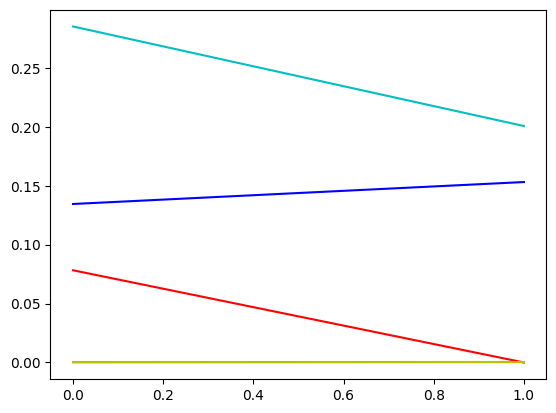


Epoch:  100
Learing Rate:  0.001
Color:  g
Learing Rate:  0.01
Color:  b
Learing Rate:  0.1
Color:  c
Learing Rate:  1
Color:  r
Learing Rate:  10
Color:  y


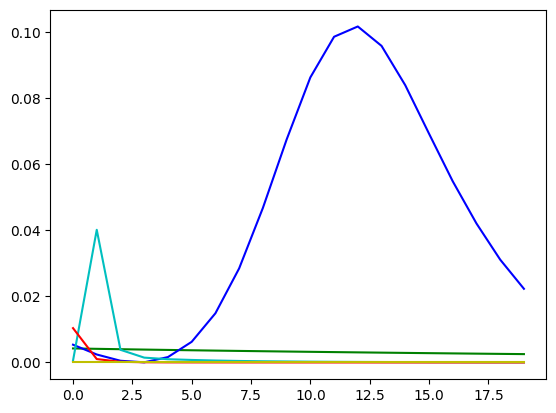


Epoch:  1000
Learing Rate:  0.001
Color:  g
Learing Rate:  0.01
Color:  b
Learing Rate:  0.1
Color:  c
Learing Rate:  1
Color:  r
Learing Rate:  10
Color:  y


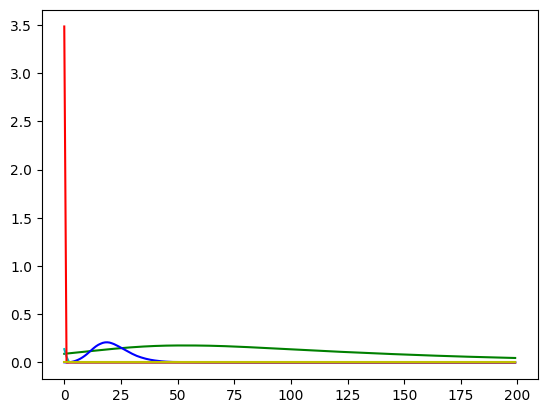


Epoch:  10000
Learing Rate:  0.001
Color:  g
Learing Rate:  0.01
Color:  b
Learing Rate:  0.1
Color:  c
Learing Rate:  1
Color:  r
Learing Rate:  10
Color:  y


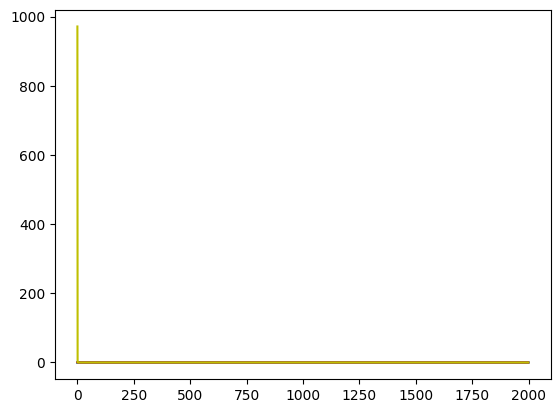

In [29]:
for epoch in epoch_s:
    i = 0
    print("\nEpoch: ", epoch)
    for lr in lr_s:
        res = train_nn(lr, epoch, X, y)
        print("Learing Rate: ", lr)
        # print(res)
        plt.plot(res, c=color[i])
        print("Color: ", color[i])
        i += 1
        
    plt.show()